# Machine Learning Regression Models Using House Price Dataset

## 1. Introduction


This notebook demonstrates a **complete supervised machine learning workflow** for a **regression problem** using a House Price dataset. The objective is to predict house prices based on multiple features using different regression models and compare their performance.

Models covered:

-  Linear Regression
-  Multiple Linear Regression
-  Polynomial Regression
-  K-Nearest Neighbors (KNN) Regression
-  Decision Tree Regression

Each section includes **code, explanation, and interpretation**.


---


## 2. Problem Definition


- **Task:** Predict house prices (continuous value)
- **Type:** Supervised Learning – Regression
- **Target Variable:** `price` (or equivalent column in dataset)



---

## 3. Import Required Libraries


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Interpretation


These libraries provide:

-  Data handling (`pandas`, `numpy`)
-  Visualization (`matplotlib`, `seaborn`)
-  Machine learning models and evaluation tools (`scikit-learn`)


---


## 4. Load the Dataset

In [43]:
df = pd.read_csv('/content/drive/MyDrive/Regression Dataset/Housing Price.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Interpretation

The dataset is loaded into a DataFrame. The `head()` function helps verify column names, data types, and overall structure.

---



## 5. Dataset Exploration (EDA)

In [44]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000



### Interpretation

-  `info()` shows missing values and data types
-  `describe()` provides statistical summaries such as mean, min, max, and standard deviation



---


### 5.1 Target Variable Distribution (House Price)


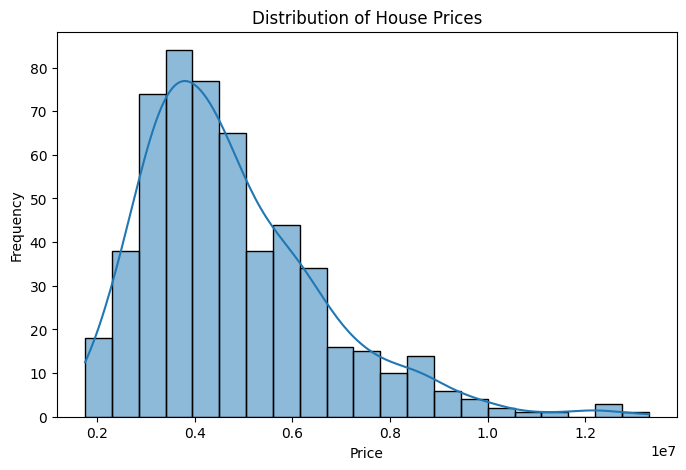

In [45]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


#### Interpretation

This visualization shows how house prices are distributed. A right-skewed distribution is common in housing datasets, indicating more low-to-mid priced houses and fewer very expensive ones.

---

### 5.2 Correlation Heatmap (After Encoding Categorical Features)


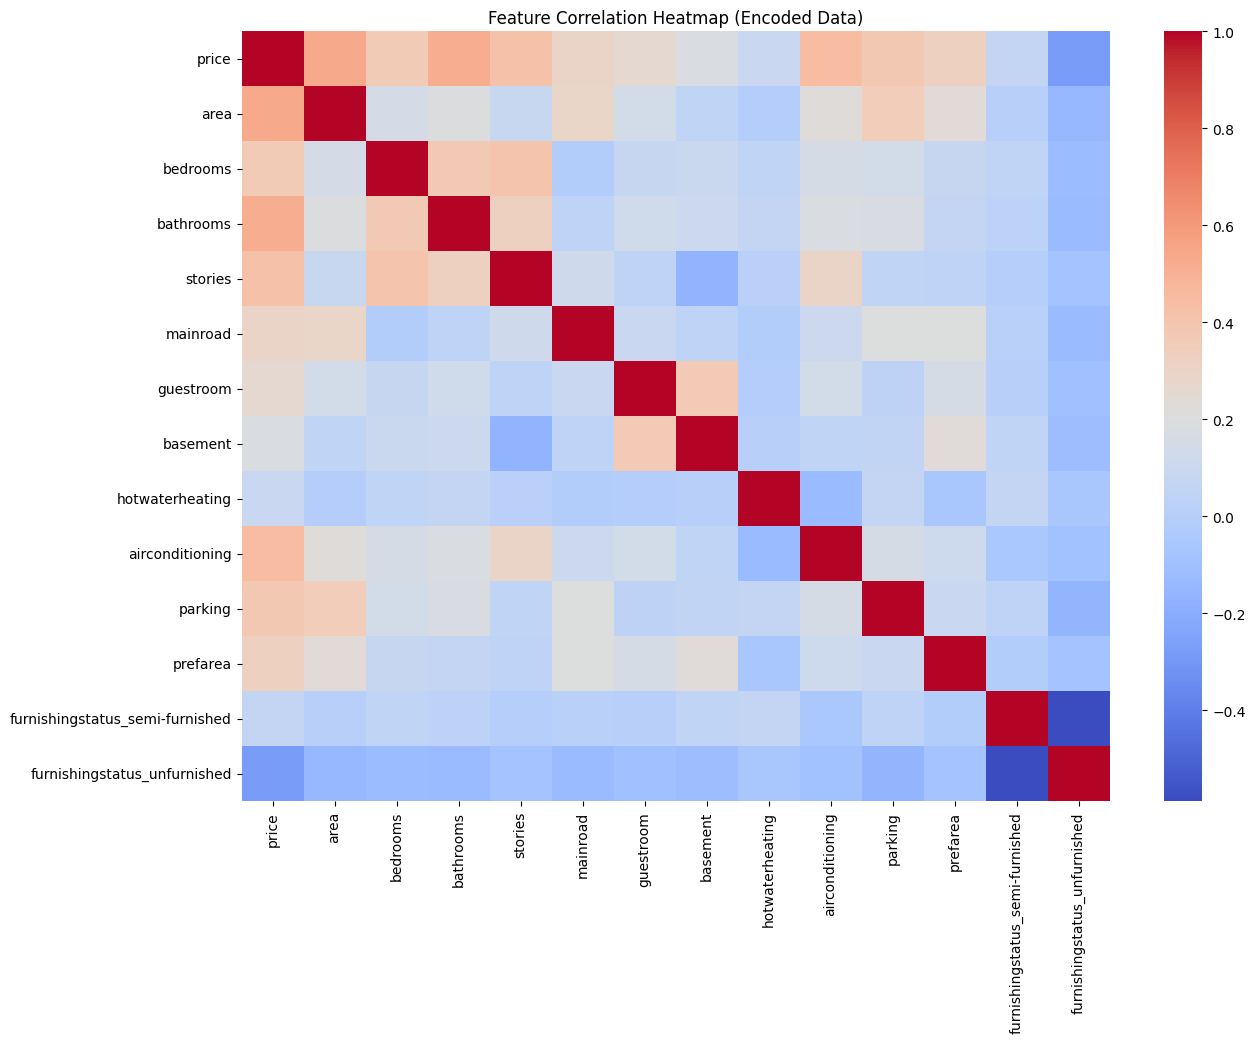

In [46]:
# Convert binary categorical columns (yes/no) to numeric
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
  if col in df.columns:
    df[col] = df[col].map({'yes': 1, 'no': 0})


# One-hot encode furnishing status if present
if 'furnishingstatus' in df.columns:
  df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


# Correlation heatmap
plt.figure(figsize=(14,10))
correlation = df.corr()
sns.heatmap(correlation, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap (Encoded Data)')
plt.show()


#### Interpretation

Categorical features are converted into numeric form so correlation can be computed correctly. The heatmap now reflects valid statistical relationships between features and house price.

---


### 5.3 Feature vs Price Scatter Plots


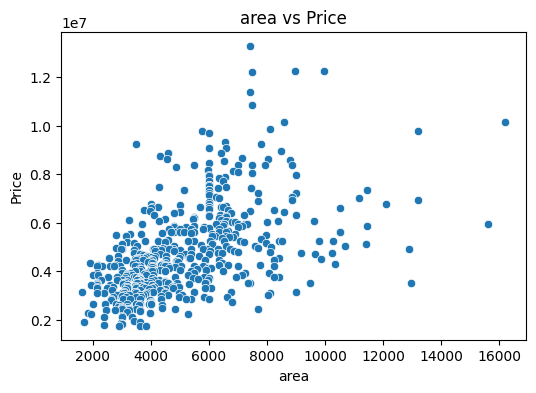

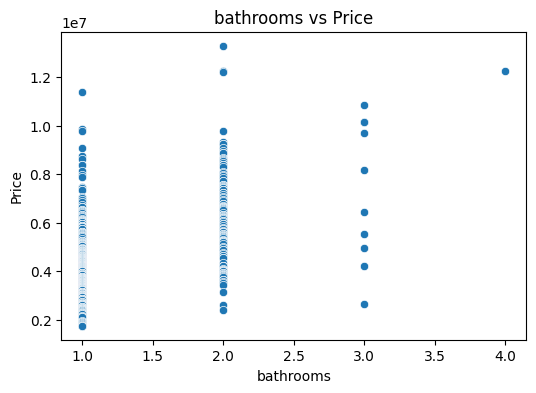

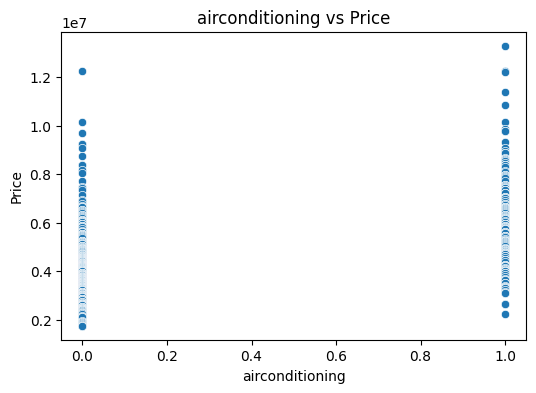

In [47]:
important_features = correlation['price'].abs().sort_values(ascending=False).index[1:4]

for feature in important_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=df['price'])
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

#### Interpretation

Scatter plots help visualize whether relationships between individual features and price are linear or non-linear, guiding model selection.


---

### 5.4 Box Plot for Outlier Detection

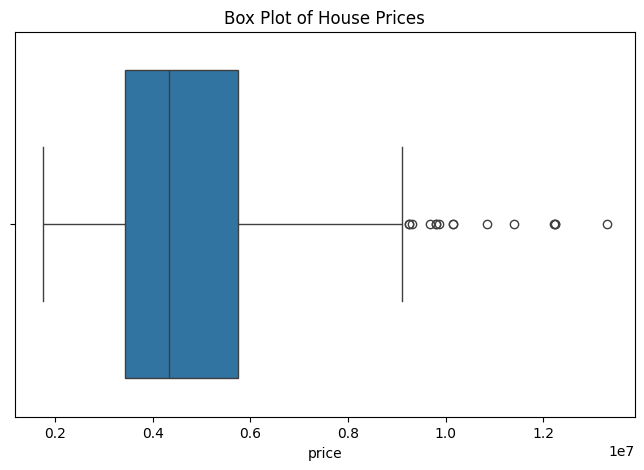

In [48]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['price'])
plt.title('Box Plot of House Prices')
plt.show()


#### Interpretation

Box plots reveal outliers in house prices. Extreme values may affect model performance and may require transformation or special handling.


---

### 5.5 Pair Plot (Optional for Small Datasets)


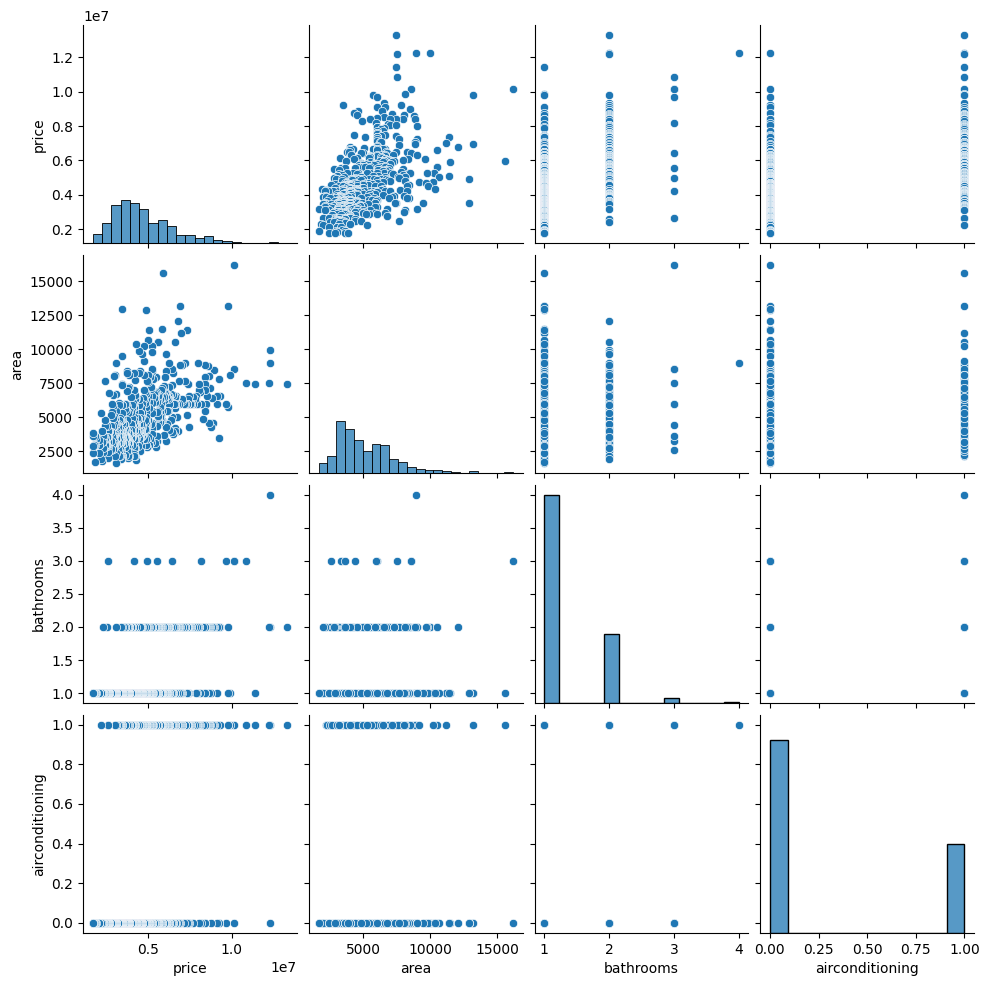

In [49]:
sns.pairplot(df[['price'] + list(important_features)])
plt.show()


#### Interpretation

Pair plots provide a comprehensive view of pairwise relationships between selected features and the target variable.

---


## 6. Handle Missing Values

In [50]:
df.isnull().sum()



,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


### Interpretation

Missing values can negatively impact model performance. Here, rows with missing values are removed for simplicity.

---

## 7. Feature Selection

In [51]:
X = df.drop('price', axis=1)
y = df['price']


### Interpretation

-  `X`: independent variables (features)
-  `y`: dependent variable (house price)


---

## 8. Train-Test Split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Interpretation

The dataset is split into:

-  **80% training data**
-  **20% testing data**

This ensures unbiased evaluation of model performance.


---

## 9. Feature Scaling

In [53]:
# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Interpretation

Scaling ensures all features contribute equally, especially important for distance-based models like KNN.

---


## 10. Linear Regression (Single Feature Example)


In [54]:
lr = LinearRegression()
lr.fit(X_train_scaled[:, :1], y_train)

y_pred_lr = lr.predict(X_test_scaled[:, :1])


### Interpretation

Linear regression models the relationship between one feature and the target using a straight line.

---

## 11. Multiple Linear Regression


In [55]:
mlr = LinearRegression()
mlr.fit(X_train_scaled, y_train)

y_pred_mlr = mlr.predict(X_test_scaled)

### Interpretation

Multiple Linear Regression considers **multiple features simultaneously**, improving prediction accuracy.

---

## 12. Polynomial Regression

In [56]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

### Interpretation

Polynomial regression captures **non-linear relationships** by introducing polynomial terms.

---

## 13. K-Nearest Neighbors (KNN) Regression

In [57]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)


### Interpretation

KNN predicts house prices based on the **average price of nearest neighboring houses** in feature space.

---

## 14. Decision Tree Regression

In [58]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


### Interpretation

Decision Trees split data into decision rules, capturing complex patterns without feature scaling.


---

## 15. Model Evaluation Function


In [59]:
def evaluate_model(y_true, y_pred, model_name):
    print(model_name)
    print('\n')
    print('MAE:', mean_absolute_error(y_true, y_pred))
    print('MSE:', mean_squared_error(y_true, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_true, y_pred)))
    print('R2 Score:', r2_score(y_true, y_pred))
    print('-' * 40)
    print('\n')

---

## 16. Evaluate All Models


In [60]:
evaluate_model(y_test, y_pred_mlr, 'Multiple Linear Regression')
evaluate_model(y_test, y_pred_poly, 'Polynomial Regression')
evaluate_model(y_test, y_pred_knn, 'KNN Regression')
evaluate_model(y_test, y_pred_dt, 'Decision Tree Regression')

Multiple Linear Regression


MAE: 970043.4039201642
MSE: 1754318687330.668
RMSE: 1324506.9600914402
R2 Score: 0.6529242642153176
----------------------------------------


Polynomial Regression


MAE: 1034749.2706758836
MSE: 1901686413946.4478
RMSE: 1379016.4661621875
R2 Score: 0.6237689217365157
----------------------------------------


KNN Regression


MAE: 999594.6055045872
MSE: 1953996997258.202
RMSE: 1397854.4263471079
R2 Score: 0.6134197563748457
----------------------------------------


Decision Tree Regression


MAE: 1195266.0550458715
MSE: 2642802637614.6787
RMSE: 1625669.904259373
R2 Score: 0.4771459275854347
----------------------------------------





### Interpretation

-  **MAE**: Average absolute error
-  **MSE / RMSE**: Penalize larger errors
-  **R² Score**: Explains variance (closer to 1 is better)


---

## 17. Model Comparison Summary


| Model                      | Strength                      | Weakness                              | Observed Performance                           |
| -------------------------- | ----------------------------- | ------------------------------------- | ---------------------------------------------- |
| Linear Regression          | Simple, highly interpretable  | Strong underfitting                   | Lowest performance, not suitable alone         |
| Multiple Linear Regression | Uses all features effectively | Assumes linear relationships          | **Best overall model (R² ≈ 0.65, lowest MAE)** |
| Polynomial Regression      | Captures mild non-linearity   | Sensitive to noise                    | Slightly worse than MLR due to overfitting     |
| KNN Regression             | Flexible, non-parametric      | Sensitive to scaling & dimensionality | Moderate performance (R² ≈ 0.61)               |
| Decision Tree Regression   | Learns complex rules          | High overfitting risk                 | Worst generalization (R² ≈ 0.48)               |



---

## 18. Conclusion


Based on the evaluation results, **Multiple Linear Regression** achieved the best overall performance, indicating that house prices in this dataset are largely influenced by linear combinations of features. **Polynomial Regression** and **KNN Regression** provided moderate performance but did not outperform the linear baseline, suggesting limited non-linear structure in the data.

**Decision Tree Regression** showed the weakest test performance due to overfitting, highlighting the importance of model regularization and pruning for tree-based models.

Overall conclusions:

-  Linear models provide strong performance and high interpretability for this dataset.
-  Non-linear models did not significantly improve accuracy, indicating mostly linear relationships.
-  Feature scaling is critical for distance-based models such as KNN.




---
---